In [1]:
from fbprophet import Prophet

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('avocado.csv')

In [4]:
df.drop(labels=['Unnamed: 0', 'year'], axis=1, inplace=True)

In [5]:
print(df.region.unique())

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [6]:
totaldf = df[df['region'] == 'TotalUS']

In [7]:
totaldf.Date.astype('datetime64')

2652    2015-12-27
2653    2015-12-20
2654    2015-12-13
2655    2015-12-06
2656    2015-11-29
2657    2015-11-22
2658    2015-11-15
2659    2015-11-08
2660    2015-11-01
2661    2015-10-25
2662    2015-10-18
2663    2015-10-11
2664    2015-10-04
2665    2015-09-27
2666    2015-09-20
2667    2015-09-13
2668    2015-09-06
2669    2015-08-30
2670    2015-08-23
2671    2015-08-16
2672    2015-08-09
2673    2015-08-02
2674    2015-07-26
2675    2015-07-19
2676    2015-07-12
2677    2015-07-05
2678    2015-06-28
2679    2015-06-21
2680    2015-06-14
2681    2015-06-07
           ...    
17479   2017-04-30
17480   2017-04-23
17481   2017-04-16
17482   2017-04-09
17483   2017-04-02
17484   2017-03-26
17485   2017-03-19
17486   2017-03-12
17487   2017-03-05
17488   2017-02-26
17489   2017-02-19
17490   2017-02-12
17491   2017-02-05
17492   2017-01-29
17493   2017-01-22
17494   2017-01-15
17495   2017-01-08
17496   2017-01-01
18213   2018-03-25
18214   2018-03-18
18215   2018-03-11
18216   2018

In [8]:
totaldf.drop(columns='region', inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
orgdf = totaldf[totaldf['type'] == 'organic']
condf = totaldf[totaldf['type'] == 'conventional']

In [10]:
orgdf_ready = orgdf[['Date', 'AveragePrice']]

In [11]:
# Organic avocados:
orgdf_ready.columns = ['ds', 'y']

In [12]:
orgdf_ready['ds'] = orgdf_ready['ds'].astype('datetime64[ns]')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
orgdf_ready.set_index('ds')

,y
ds,
2015-12-27,1.52
2015-12-20,1.53
2015-12-13,1.43
2015-12-06,1.52
2015-11-29,1.50
2015-11-22,1.49
2015-11-15,1.60
2015-11-08,1.54
2015-11-01,1.47


In [14]:
print(orgdf_ready)

              ds     y
11778 2015-12-27  1.52
11779 2015-12-20  1.53
11780 2015-12-13  1.43
11781 2015-12-06  1.52
11782 2015-11-29  1.50
11783 2015-11-22  1.49
11784 2015-11-15  1.60
11785 2015-11-08  1.54
11786 2015-11-01  1.47
11787 2015-10-25  1.62
11788 2015-10-18  1.71
11789 2015-10-11  1.69
11790 2015-10-04  1.72
11791 2015-09-27  1.75
11792 2015-09-20  1.77
11793 2015-09-13  1.80
11794 2015-09-06  1.78
11795 2015-08-30  1.66
11796 2015-08-23  1.72
11797 2015-08-16  1.75
11798 2015-08-09  1.00
11799 2015-08-02  1.00
11800 2015-07-26  1.00
11801 2015-07-19  1.00
11802 2015-07-12  1.00
11803 2015-07-05  1.00
11804 2015-06-28  1.64
11805 2015-06-21  1.66
11806 2015-06-14  1.68
11807 2015-06-07  1.67
...          ...   ...
17479 2017-04-30  1.68
17480 2017-04-23  1.61
17481 2017-04-16  1.49
17482 2017-04-09  1.43
17483 2017-04-02  1.42
17484 2017-03-26  1.29
17485 2017-03-19  1.50
17486 2017-03-12  1.38
17487 2017-03-05  1.16
17488 2017-02-26  1.21
17489 2017-02-19  1.31
17490 2017-

In [15]:
m = Prophet()
m.fit(orgdf_ready)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [16]:
future = m.make_future_dataframe(periods=365)

In [17]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.777671,1.609277,1.948130
530,2019-03-22,1.785573,1.620641,1.961211
531,2019-03-23,1.793586,1.620821,1.961654
532,2019-03-24,1.801608,1.627723,1.989270
533,2019-03-25,1.809540,1.624910,1.982561


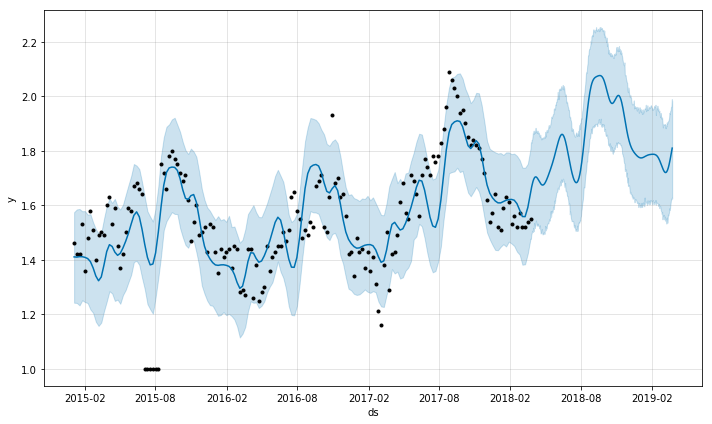

In [18]:
fig1 = m.plot(forecast) # Organic Avocado Prices - y=price, ds= time

In [19]:
# Conventional (Non-organic) Avocados:
condf_ready = condf[['Date', 'AveragePrice']]
condf_ready.columns = ['ds', 'y']



In [20]:
condf_ready['ds'] = condf_ready['ds'].astype('datetime64[ns]')
condf_ready.set_index('ds')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,y
ds,
2015-12-27,0.95
2015-12-20,0.98
2015-12-13,0.93
2015-12-06,0.89
2015-11-29,0.99
2015-11-22,0.96
2015-11-15,0.92
2015-11-08,0.97
2015-11-01,0.97


In [21]:
n = Prophet()
n.fit(condf_ready)
future_n = n.make_future_dataframe(periods=365)
forecast_n = n.predict(future_n)
forecast_n[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.100679,0.976583,1.231437
530,2019-03-22,1.101912,0.962168,1.237652
531,2019-03-23,1.103614,0.972495,1.232295
532,2019-03-24,1.105771,0.986734,1.236034
533,2019-03-25,1.108353,0.978300,1.244847


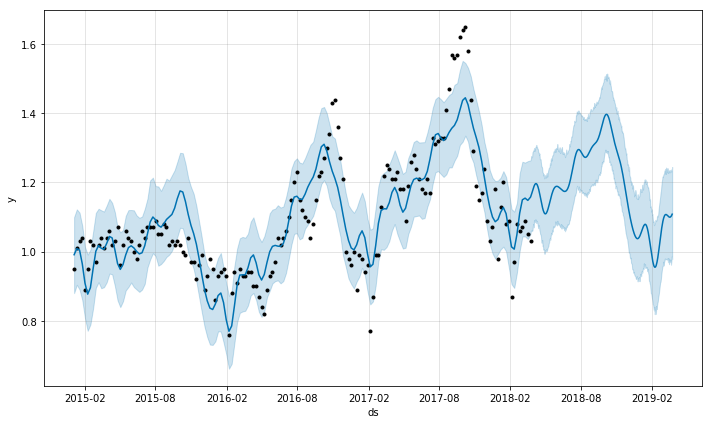

In [22]:
fig2 = n.plot(forecast_n) # Conventional Avocados y = price, ds = date